In [1]:
from frozen.factor.extensions import alphalens as al
from frozen.factor.expression.utils import *
from frozen.utils import AlphaPlot

In [2]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))
from demo.strategy.momentum.momentum import FactorFactory

In [3]:
strategy = FactorFactory()

In [4]:
alpha = strategy.calc()

In [5]:
alpha.data

ticker,000001.SZ,000002.SZ,000063.SZ,000100.SZ,000157.SZ,000166.SZ,000301.SZ,000333.SZ,000338.SZ,000408.SZ,...,603288.SH,603369.SH,603501.SH,603659.SH,603799.SH,603806.SH,603833.SH,603899.SH,603986.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2019-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-16,0.143368,NaN,0.000021,-0.056972,0.006086,0.017132,NaN,-0.090485,0.013939,0.067773,...,-0.121017,-0.104905,-0.061472,-0.021640,0.032334,-0.013108,-0.129132,0.043055,0.044071,0.043508
2025-06-17,0.133106,NaN,-0.015463,0.024250,0.064660,0.035841,NaN,-0.052188,0.029762,0.080739,...,-0.092589,-0.116284,-0.070206,0.054493,0.071230,0.016134,-0.118065,0.013720,0.070714,0.046980
2025-06-18,0.106530,NaN,-0.030244,0.020777,0.028461,-0.033302,NaN,-0.063996,0.031535,0.061347,...,-0.114509,-0.118912,-0.067952,0.051292,0.040808,0.017178,-0.138124,-0.044337,0.053881,0.021558


## Alphalens

In [6]:
from frozen.data.etl.dataload import DataLoadManager, DatabaseTypes

In [7]:
dataloader = DataLoadManager(DatabaseTypes.DUCKDB)
all_data = dataloader.load_volume_price('stock_daily_hfq', 'close', strategy.universe, start_date=strategy.start_date_extend, end_date=strategy.end_date)
al_alpha = alpha.data.stack().reset_index()
al_alpha.columns = ['date', 'ticker', 'Alpha']
al_alpha.set_index(['date', 'ticker'], inplace=True)

In [8]:
al_alpha

Alpha
date       ticker             
2019-08-22 000001.SZ  0.107603
           000002.SZ  0.323772
           000100.SZ  0.027026
           000157.SZ  0.013356
           000166.SZ  0.046423
...                        ...
2025-06-20 603806.SH  0.013287
           603833.SH -0.111306
           603899.SH -0.103970
           603986.SH -0.002658
           603993.SH  0.020819

[320801 rows x 1 columns]

In [9]:
data = al.utils.get_clean_factor_and_forward_returns(al_alpha, all_data, quantiles=5, periods=(1, 5, 20))

Dropped 7.7% entries from factor data: 7.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.150908,0.051299,-0.088762,0.026195,59648,20.148424
2,-0.126606,0.088503,-0.048365,0.030519,58998,19.928862
3,-0.111753,0.105866,-0.012654,0.032274,58929,19.905554
4,-0.088456,0.121827,0.027499,0.029802,58998,19.928862
5,-0.053135,0.774070,0.114983,0.107563,59470,20.088298


Returns Analysis


,1D,5D,20D
Ann. alpha,0.033,0.007,-0.007
beta,-0.033,-0.051,-0.001
Mean Period Wise Return Top Quantile (bps),0.837,-0.054,-0.108
Mean Period Wise Return Bottom Quantile (bps),-2.531,-0.972,-0.301
Mean Period Wise Spread (bps),3.367,0.869,0.160


<Figure size 640x480 with 0 Axes>

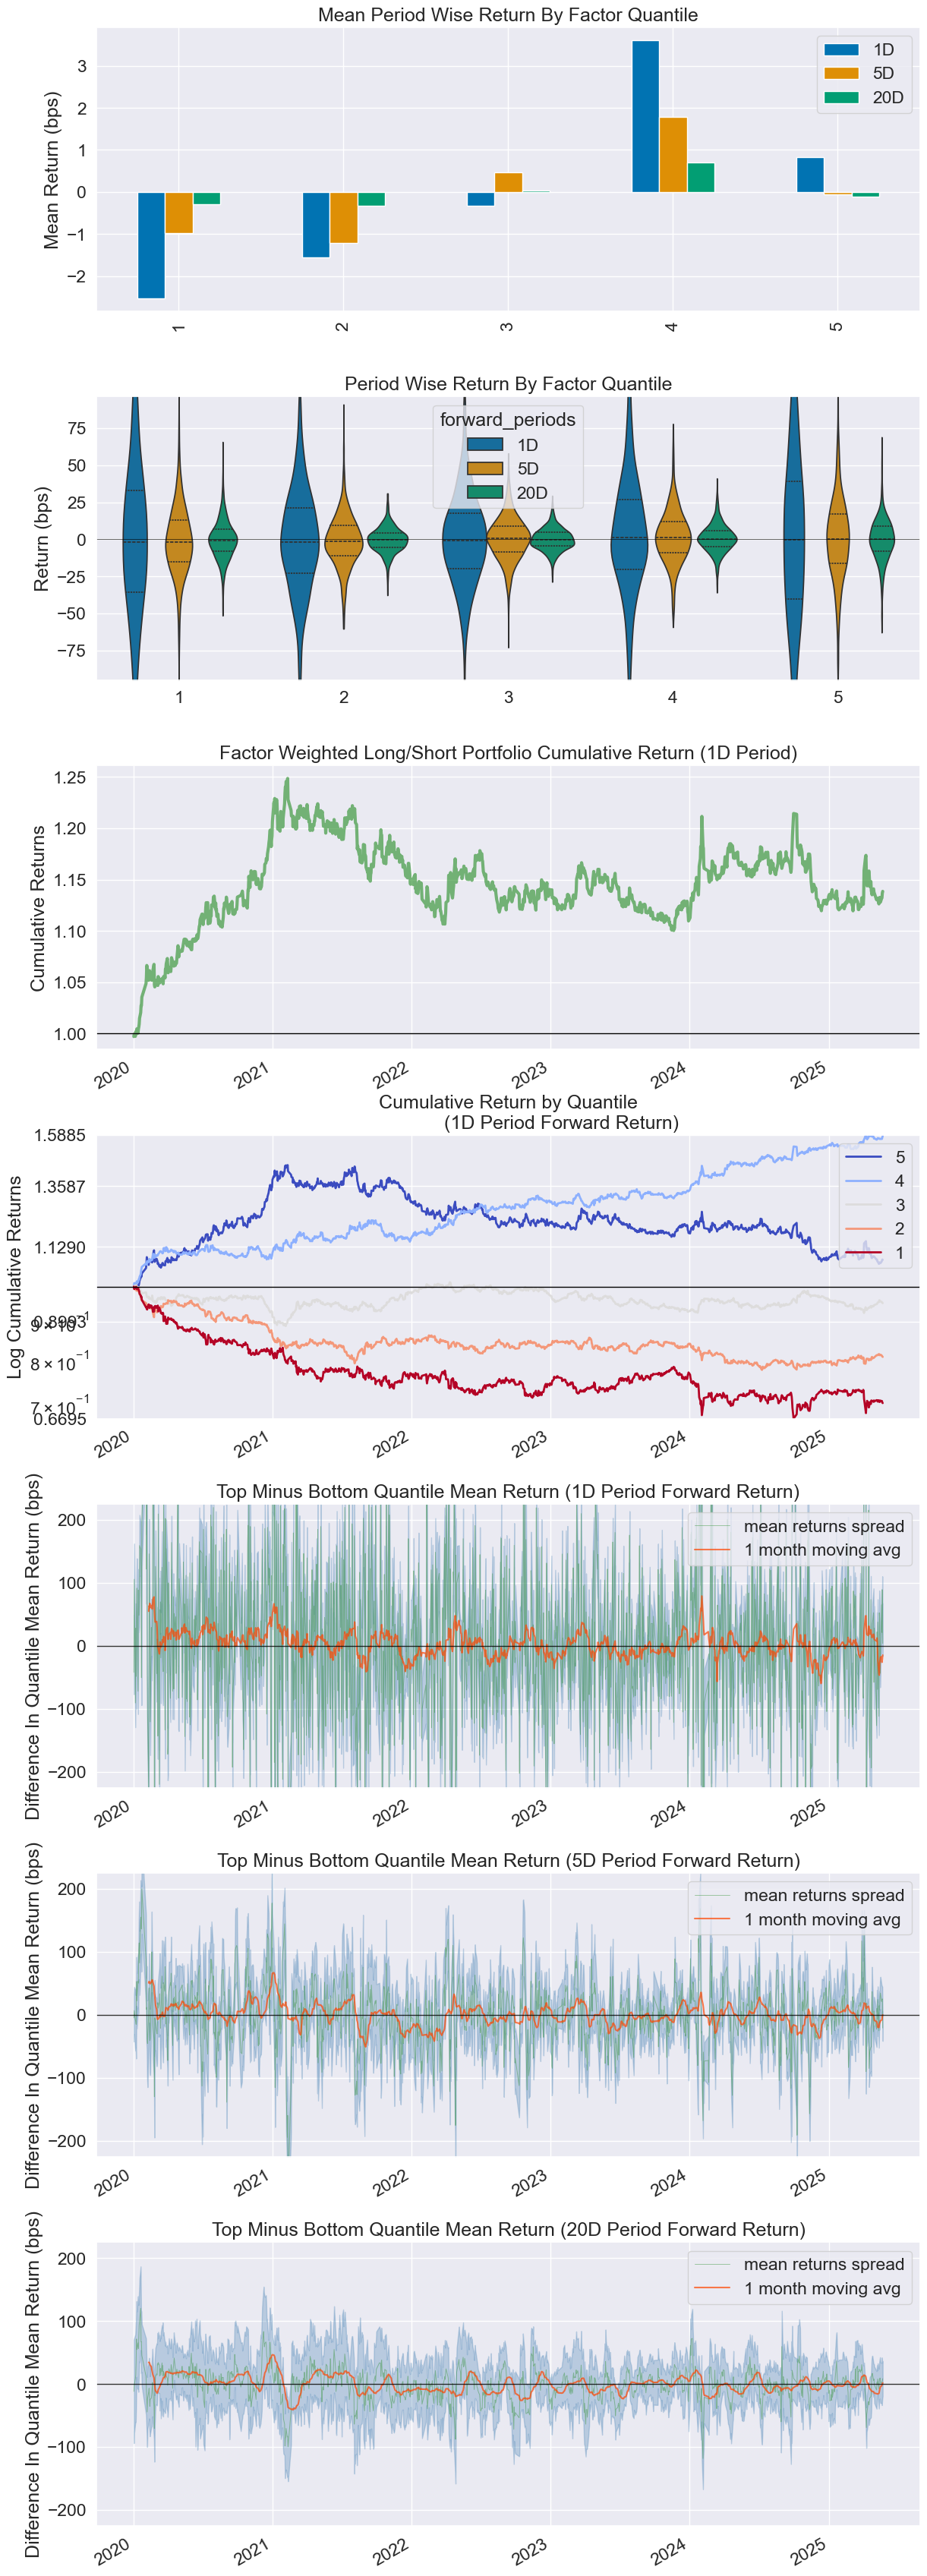

Information Analysis


,1D,5D,20D
IC Mean,-0.012,-0.001,-0.006
IC Std.,0.192,0.175,0.170
Risk-Adjusted IC,-0.061,-0.005,-0.033
t-stat(IC),-2.218,-0.167,-1.191
p-value(IC),0.027,0.868,0.234
IC Skew,0.038,-0.141,-0.245
IC Kurtosis,0.151,0.100,0.406


<Figure size 640x480 with 0 Axes>

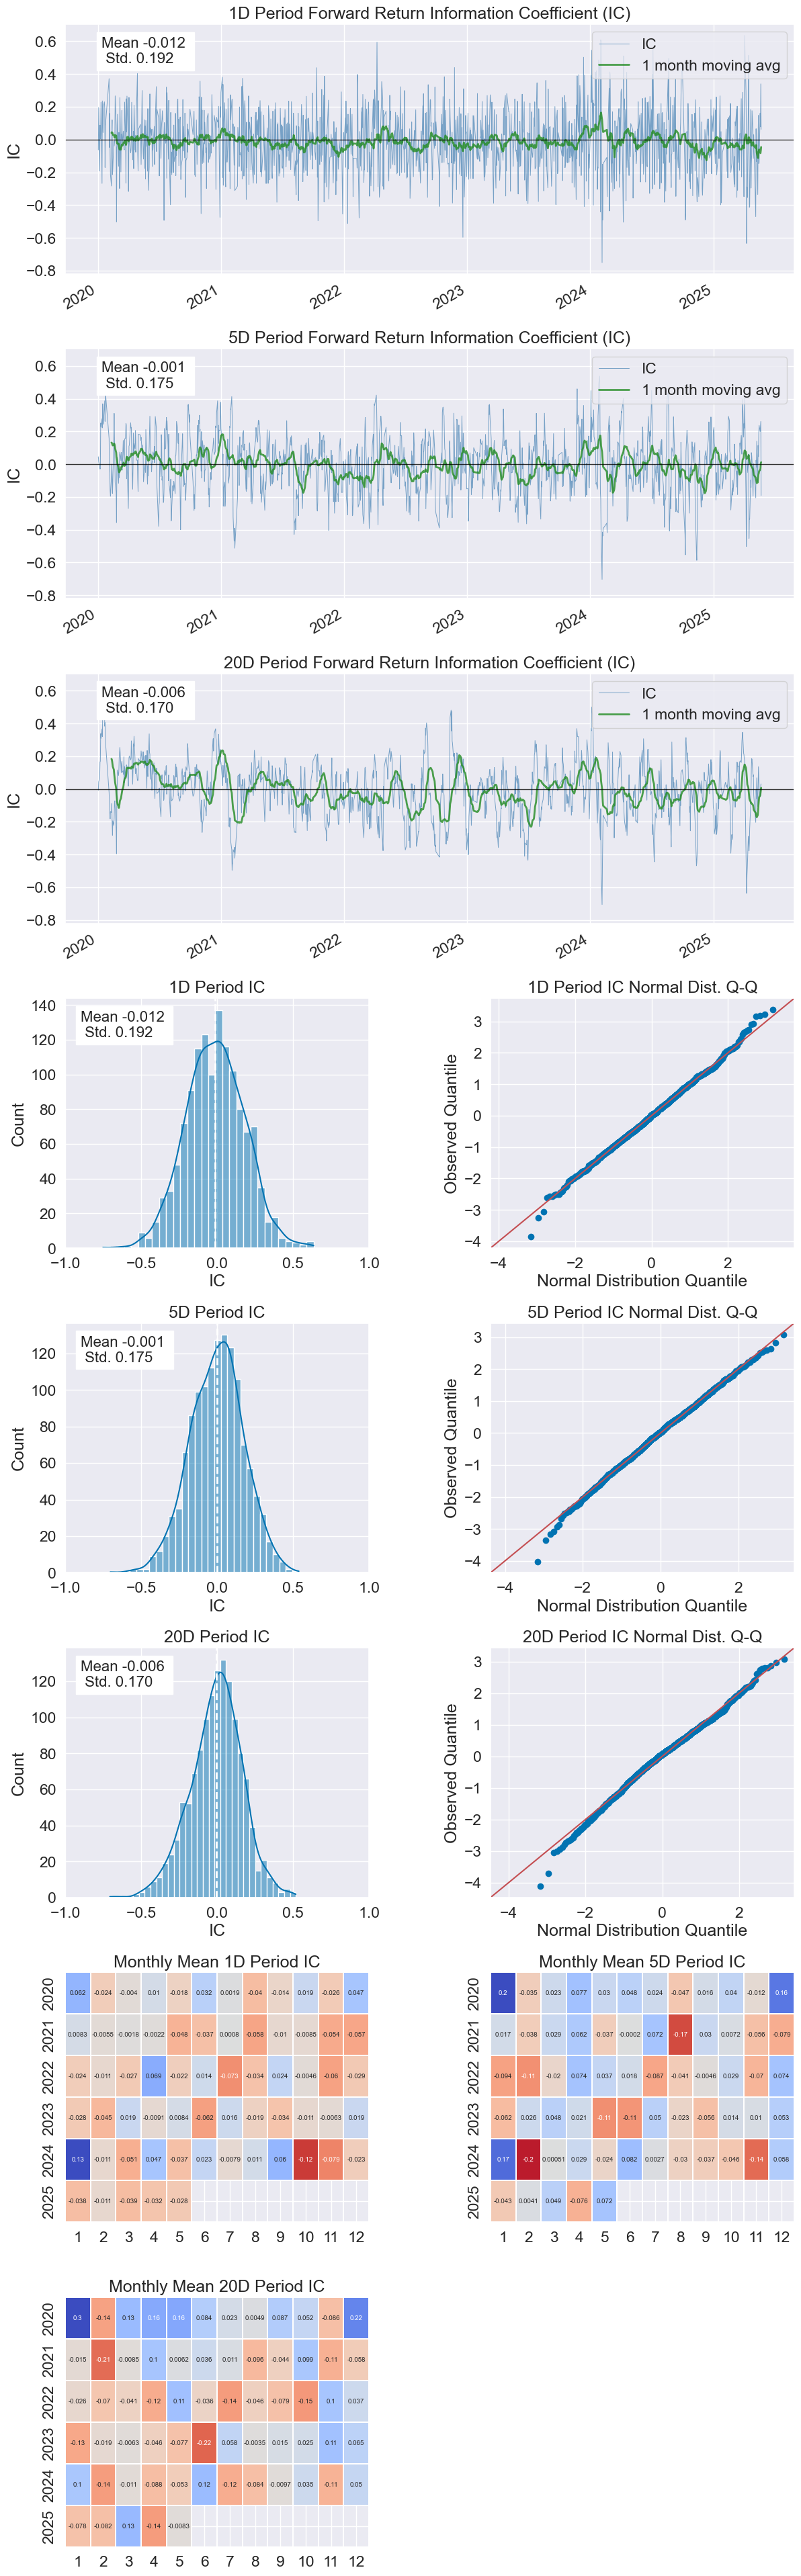

Turnover Analysis


,1D,5D,20D
Quantile 1 Mean Turnover,0.277,0.552,0.775
Quantile 2 Mean Turnover,0.518,0.724,0.776
Quantile 3 Mean Turnover,0.548,0.746,0.790
Quantile 4 Mean Turnover,0.495,0.713,0.797
Quantile 5 Mean Turnover,0.238,0.451,0.623


,1D,5D,20D
Mean Factor Rank Autocorrelation,0.876,0.56,0.174


<Figure size 640x480 with 0 Axes>

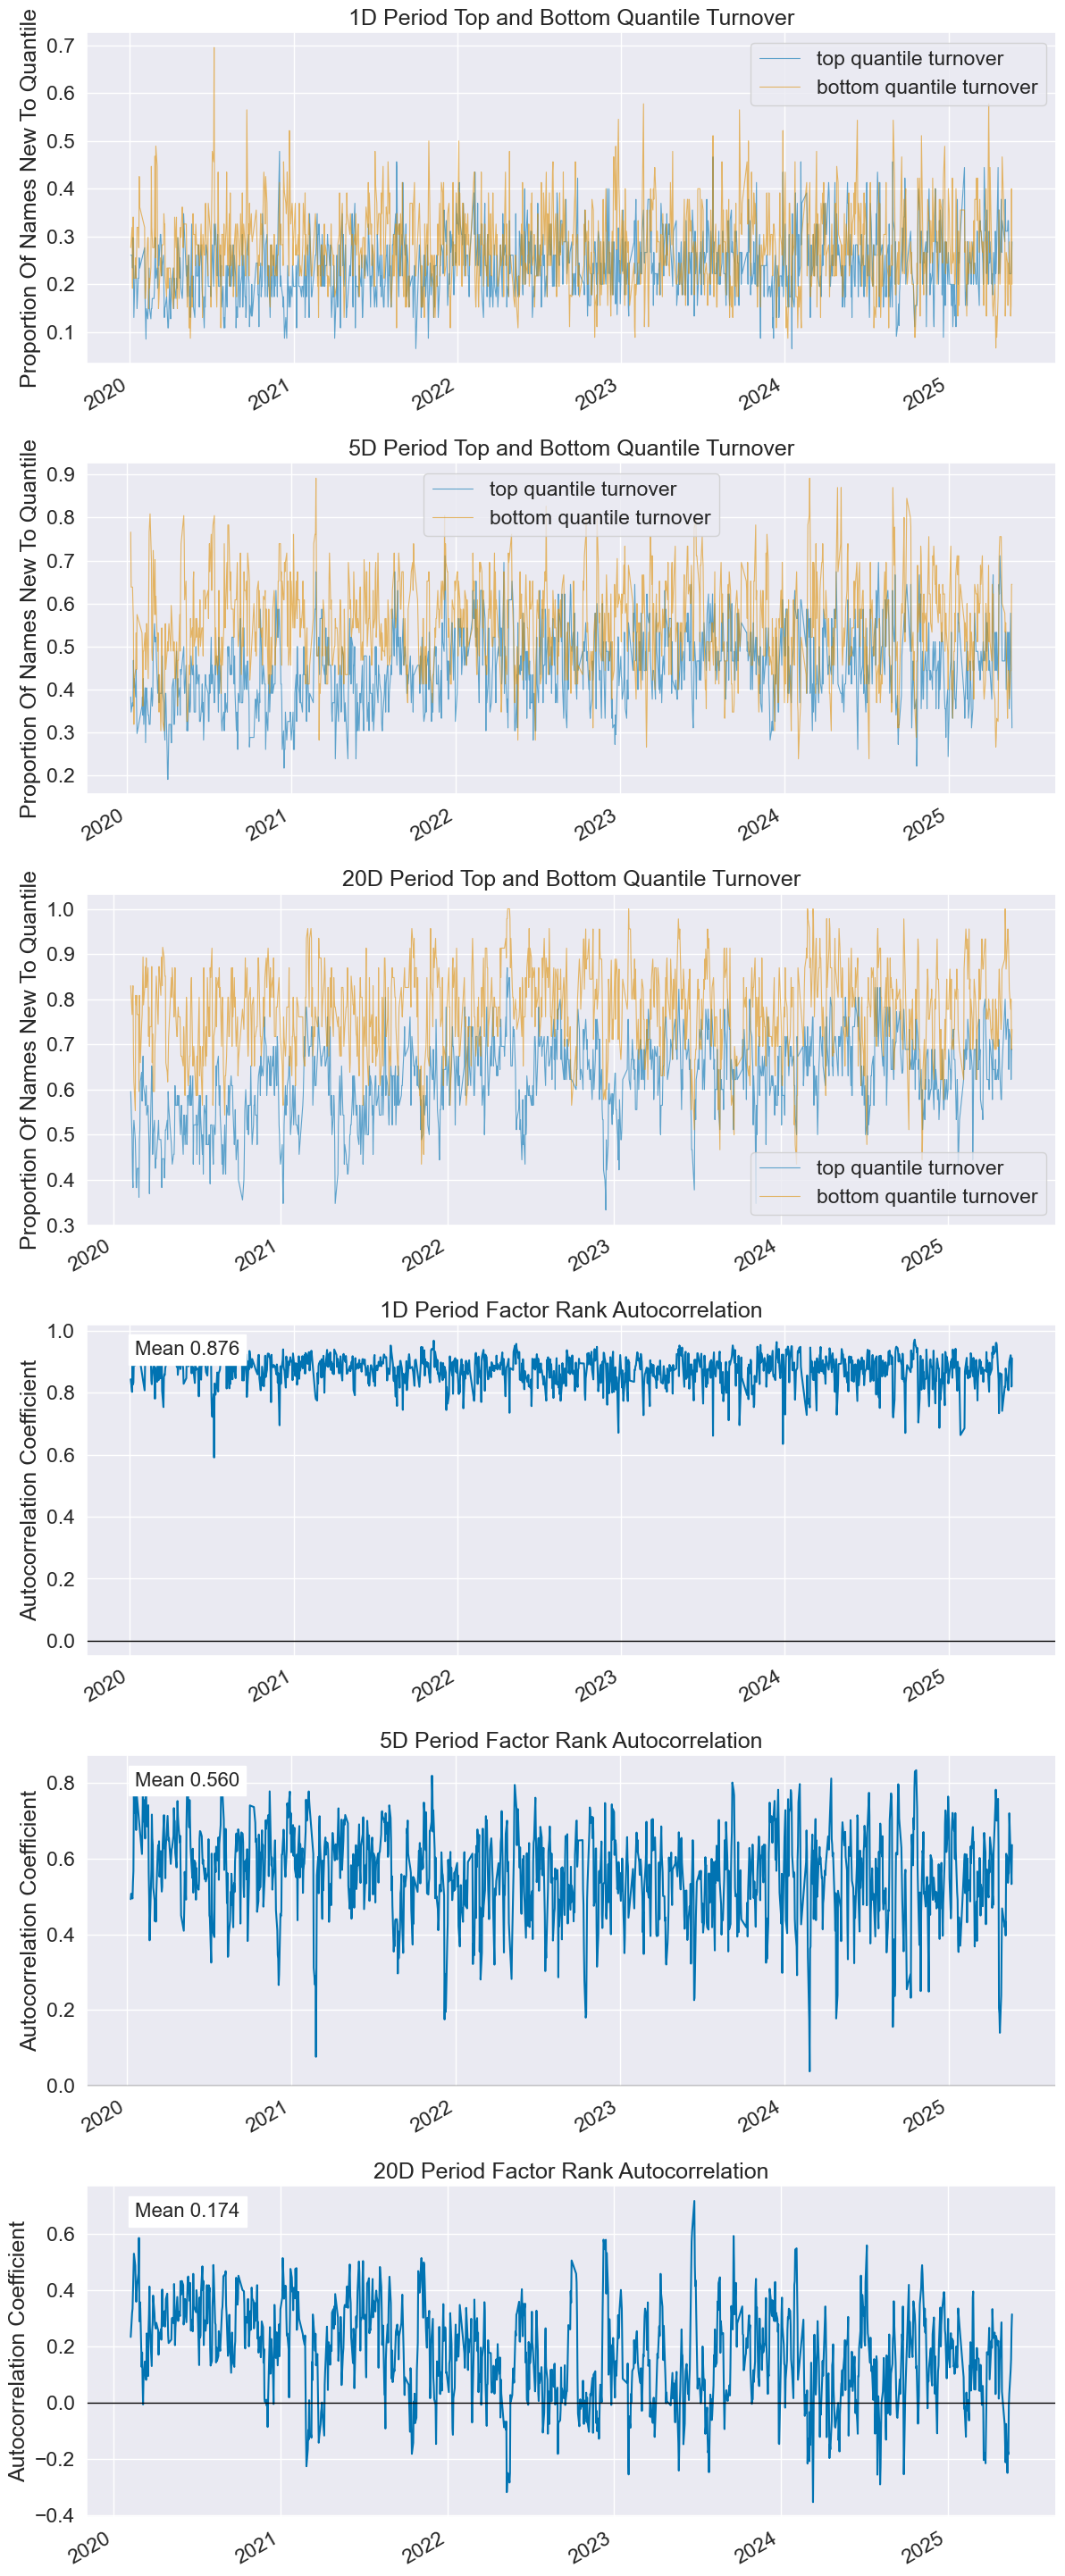

In [10]:
al.tears.create_full_tear_sheet(data)

## Customize

In [11]:
alpha = alpha.data

In [12]:
al_plot = AlphaPlot(strategy.config)
al_plot.set_alpha(alpha)
al_plot.set_prices(all_data)

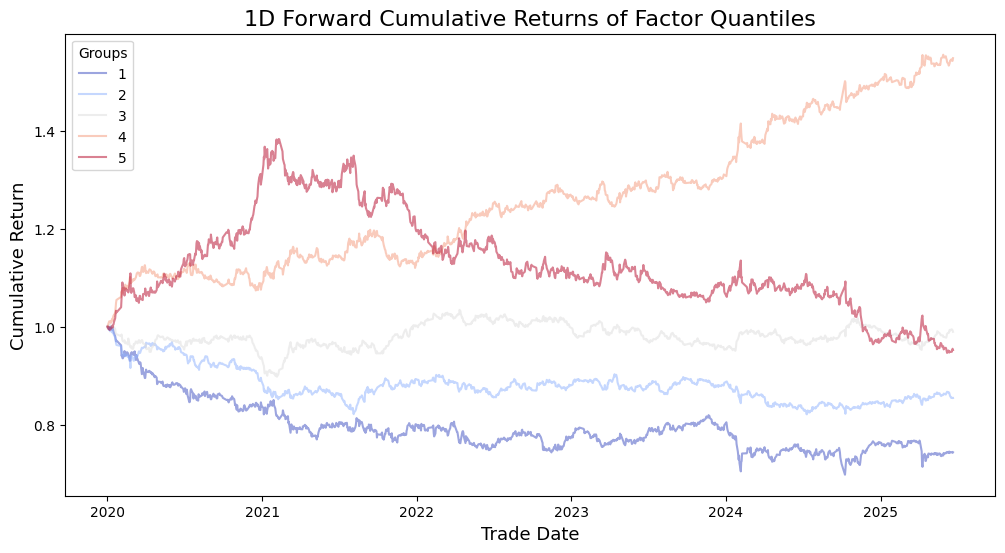

In [13]:
al_plot.factor_layers(log_ret=True, demeaned=True, n_groups=5)

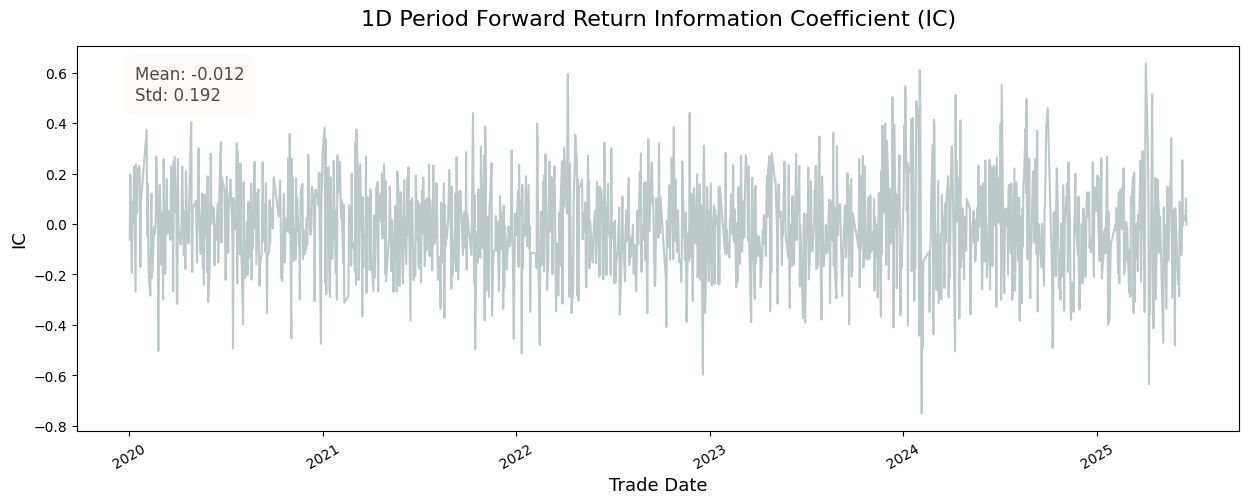

In [14]:
al_plot.period_ic_ts(1)

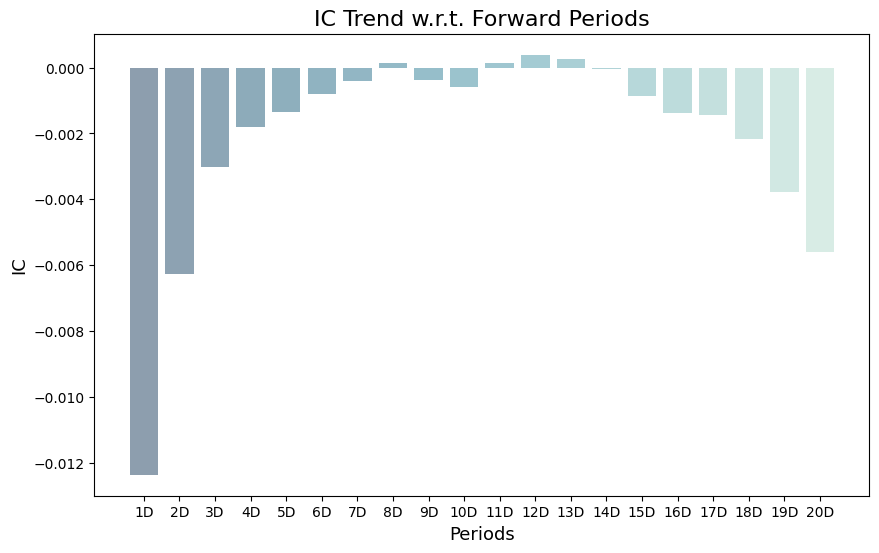

In [15]:
al_plot.period_ic_bar(20)